## Pandas analysis

In the following a series of exercises is proposed on a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGA's. Each measurement (i.e. each raw) consists of the address of the TDC providing the signal, 'FPGA' and 'TDC_Channel, and the timing information itself, 'ORBIT_CNT', 'BX_COUNTER' and 'TDC_MEAS'. Each TDC count correspond 25/30 ns, whereas the BX_COUNTER feauters gets updated every 25 ns and the ORBIT_CNT every 'x' BX_COUNTER. You can see these way of storing the time as similar to hours, minutes and seconds.

1\. Create a Pandas DataFrame by read N raws of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of raws and larger that 10k.

2\. Find out the value of 'x'

3\. Find out how much the data taking lasted. You can either make an estimate on the baseis of the fraction of the measurements (raws) you read, or perform this check precisely by reading out the whole dataset

4\. Create a new column with the actual time in ns (as a combination of the other three columns with timing information)

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1

6\. Create a new DataFrame with only the raws with HEAD=1

7\. Make two occupancy plots (one per FPGA), i.e. plot the number of counts per TDC channel

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [1]:
import pandas as pd
import numpy as np

#### Q1

In [2]:
file_name="/home/frazzetp/data/data_000637.txt"
data=pd.read_csv(file_name, nrows=1e5)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
5,1,0,63,3869200167,2762,4
6,1,0,61,3869200167,2772,14
7,1,0,139,3869200167,2776,0
8,1,0,62,3869200167,2774,21
9,1,0,60,3869200167,2788,7


In [3]:
data.describe()

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
count,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000
mean,1.0,0.294840,56.031850,3.869201e+09,1792.946820,13.360150
std,0.0,0.455973,39.118372,2.868888e+02,1025.768294,9.190047
min,1.0,0.000000,1.000000,3.869200e+09,0.000000,0.000000
25%,1.0,0.000000,26.000000,3.869200e+09,897.000000,5.000000
50%,1.0,0.000000,57.000000,3.869201e+09,1794.000000,13.000000
75%,1.0,1.000000,64.000000,3.869201e+09,2679.000000,21.000000
max,1.0,1.000000,139.000000,3.869201e+09,3563.000000,29.000000


#### Q2

In [4]:
update = data['BX_COUNTER'].max()-data['BX_COUNTER'].min()+1 # +1 since counting starts from 0
print("Update rate of ORBIT_CNT is every",update," BX_COUNTs")

Update rate of ORBIT_CNT is every 3564  BX_COUNTs


#### Q3 & Q4

In [5]:
data['time_ns']=data['TDC_MEAS']*25./30.+data['BX_COUNTER']*25.+(data['ORBIT_CNT']-data['ORBIT_CNT'].min())*update*data['BX_COUNTER']*25.
print("Update rate of ORBIT_CNT is every",update," BX_COUNTs")
print("Data acquisition time:",(data['time_ns'].max()-data['time_ns'].min())*1e-9,"s")

Update rate of ORBIT_CNT is every 3564  BX_COUNTs
Data acquisition time: 314.533335392 s


#### Q5

In [6]:
np.random.seed(1234)
data["HEAD"] = np.random.randint(2,size=(len(data.index),))
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,time_ns
0,1,0,123,3869200167,2374,26,5.937167e+04
1,1,0,124,3869200167,2374,27,5.937250e+04
2,0,0,63,3869200167,2553,28,6.384833e+04
3,1,0,64,3869200167,2558,19,6.396583e+04
4,0,0,64,3869200167,2760,25,6.902083e+04
5,0,0,63,3869200167,2762,4,6.905333e+04
6,0,0,61,3869200167,2772,14,6.931167e+04
7,1,0,139,3869200167,2776,0,6.940000e+04
8,1,0,62,3869200167,2774,21,6.936750e+04
9,1,0,60,3869200167,2788,7,6.970583e+04


#### Q6

In [7]:
new_data = data[data['HEAD'] == 1]
new_data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,time_ns
0,1,0,123,3869200167,2374,26,5.937167e+04
1,1,0,124,3869200167,2374,27,5.937250e+04
3,1,0,64,3869200167,2558,19,6.396583e+04
7,1,0,139,3869200167,2776,0,6.940000e+04
8,1,0,62,3869200167,2774,21,6.936750e+04
9,1,0,60,3869200167,2788,7,6.970583e+04
10,1,1,7,3869200167,2785,4,6.962833e+04
11,1,0,64,3869200167,2786,19,6.966583e+04
14,1,0,56,3869200167,2789,3,6.972750e+04
24,1,0,58,3869200167,2795,19,6.989083e+04


#### Q7

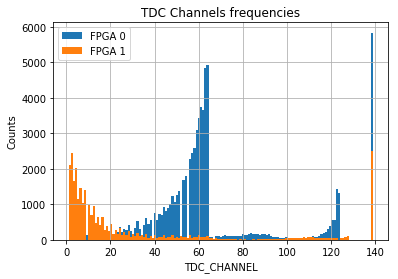

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
data.groupby('FPGA').hist(column='TDC_CHANNEL',bins=data['TDC_CHANNEL'].max(),ax=ax,sharex=True)
ax.set_xlabel("TDC_CHANNEL")
ax.set_ylabel("Counts")
ax.legend(['FPGA 0','FPGA 1'])
plt.title('TDC Channels frequencies')
plt.legend()

#### Q8

In [9]:
counts = data.groupby(['FPGA','TDC_CHANNEL']).size() # it's a Series!
print('Top 3 channels with most counts for FPGA 0: ','\n',counts.loc[0].nlargest(3))
print('Top 3 channels with most counts for FPGA 1: ','\n',counts.loc[1].nlargest(3))

Top 3 channels with most counts for FPGA 0:  
 TDC_CHANNEL
139    5831
64     4916
63     4845
dtype: int64
Top 3 channels with most counts for FPGA 1:  
 TDC_CHANNEL
139    2489
2      2444
1      2116
dtype: int64


#### Q9

In [10]:
orbit_counts = data.groupby(['FPGA','ORBIT_CNT']).size()
print('Unique orbits count for FPGA 0:',orbit_counts.loc[0].size)
print('Unique orbits count for FPGA 1:',orbit_counts.loc[1].size)

Unique orbits count for FPGA 0: 995
Unique orbits count for FPGA 1: 994


In [11]:
orbit_counts_139 = data[data['TDC_CHANNEL'] == 139].groupby(['FPGA','ORBIT_CNT']).size()
print('Unique orbits count for FPGA 0 with TDC = 139:',orbit_counts_139.loc[0].size)
print('Unique orbits count for FPGA 1 with TDC = 139:',orbit_counts_139.loc[1].size)

Unique orbits count for FPGA 0 with TDC = 139: 993
Unique orbits count for FPGA 1 with TDC = 139: 932
